<a href="https://colab.research.google.com/github/vaibhavipatel1604/ODSML-Assignment/blob/assignment-1/Assignment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

## **B1. Minimizing a Real Function**

Defining the function f(x) = 3x<sup>2</sup> + 2xy + y<sup>2</sup> + 4x +5y + 6 and its Gradient and its Hessian

In [2]:
# original function
def f(x,y):
  return 3*x**2 + 2*x*y + y**2 + 4*x + 5*y + 6

# gradient of the function
def gradient_f(x,y):
  df_dx = 6*x + 2*y + 4
  df_dy = 2*x + 2*y + 5
  return np.array([df_dx, df_dy])

# Hessian of the function
def hessian_f(x,y):
  d2f_dx2 = 6
  d2f_dxdy = 2 # d2f_dydx is equal to d2f_dxdy
  d2f_dy2 = 2
  return np.array([[d2f_dx2, d2f_dxdy],[d2f_dxdy, d2f_dy2]])

Implementing gradient descent on the function

In [3]:
# Gradient Descent
def gradient_descent(start_x, start_y, learning_rate=0.1, tolerance=1e-6, max_iterations=1000):
    x, y = start_x, start_y
    iterations = 0
    path_gd = [(x,y)]
    while (np.linalg.norm(gradient_f(x,y)) > tolerance) and (iterations < max_iterations):
        grad = gradient_f(x, y)
        x_new = x - learning_rate * grad[0]
        y_new = y - learning_rate * grad[1]
        path_gd.append((x_new,y_new))
        iterations += 1
        x, y = x_new, y_new
    return x_new, y_new, path_gd, iterations

Implementing Newton's Method on the function

In [4]:
# Newton's Method
def newton_method(start_x, start_y, tolerance=1e-6, max_iterations=100):
    x, y = start_x, start_y
    iterations = 0
    path_newton = [(x,y)]
    while (np.linalg.norm(gradient_f(x,y)) > tolerance) and (iterations < max_iterations):
        grad = gradient_f(x, y)
        hess = hessian_f(x, y)
        update =  np.linalg.inv(hess).dot(grad)
        x_new = x - update[0]
        y_new = y - update[1]
        path_newton.append((x_new,y_new))
        iterations += 1
        x, y = x_new, y_new
    return x_new, y_new, path_newton, iterations

Performing gradient descent and newton's method

In [5]:
# Initializing starting values of x and y
start_x, start_y = 1, 1

# Performing gradient descent
x_gd, y_gd, path_gd, iterations_gd = gradient_descent(start_x, start_y)

# Performing Newton's method
x_newton, y_newton, path_newton, iterations_newton = newton_method(start_x, start_y)

# Printing gradient descent result

print("Gradient Descent is Minimum at", x_gd, y_gd)
print("Objective value at minimum is ", f(x_gd, y_gd))
print(f"Iterations: {iterations_gd}")

# Printing Newton's method result
print(f"Newton's Method: Minimum at ", x_newton, y_newton)
print("Objective value ate minimum is", f(x_newton, y_newton))
print(f"Iterations: {iterations_newton}")

Gradient Descent is Minimum at 0.24999969612348275 -2.749999266377191
Objective value at minimum is  -0.3749999999996314
Iterations: 122
Newton's Method: Minimum at  0.24999999999999956 -2.75
Objective value ate minimum is -0.375
Iterations: 1


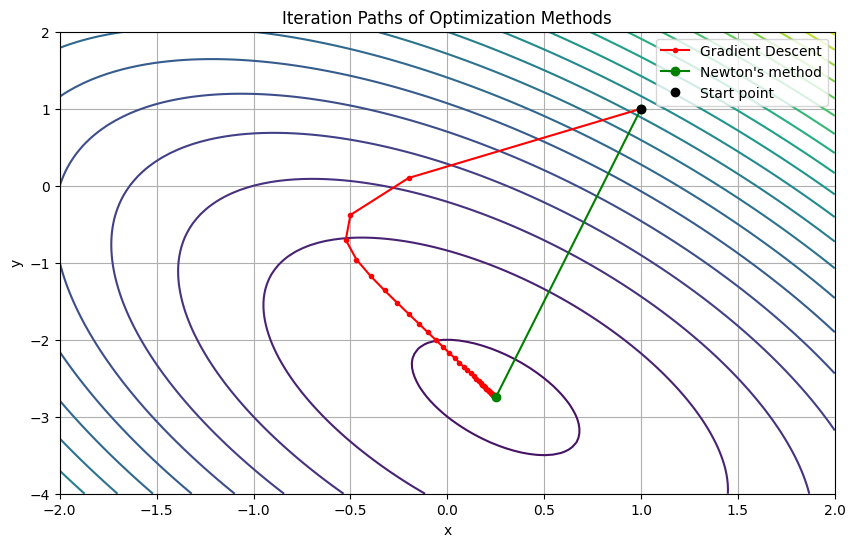

In [6]:
# Plot the paths
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-4, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X,Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, 20)
history_gd = np.array(path_gd)
plt.plot(history_gd[:, 0], history_gd[:, 1], '.-', color='r', label="Gradient Descent")
history_newton = np.array(path_newton)
plt.plot(history_newton[:, 0], history_newton[:, 1], 'o-', color='g', label="Newton's method")
plt.plot(start_x, start_y, 'o', color='black', label='Start point')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Iteration Paths of Optimization Methods")
plt.legend()
plt.grid(True)
plt.show()

**Comapring gradient descent and newton's method**


- Gradient descent takes smaller steps because α is 0.1. gradient descents converges to minimum point in 122 iterations.

- Newton’s method converges to minimum point in one iteration  because it uses second-order information.

Both methods reach the same minimum, but the speed differs because they have different iteration counts.

## **B2. Small Data Problem**

Taking a small dataset of 5 features and 100 datapoints for classification

In [7]:
# Generate synthetic data for binary classification
np.random.seed(0)
X = (2 * (np.random.rand(100, 5))).astype(int)  # 100 data points with 5 features
y = (X[:, 0] + X[:, 1] + X[:, 2] + X[:, 3] + X[:, 4] > 3).astype(int)  # Binary classification target

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 (a) Explain how the library likely implements gradient-based optimization

 - Scikit-learn's LogisticRegression model uses several optimization algorithms (solvers) to find the best parameters, including "liblinear", "newton-cg", "sag", "saga", and "lbfgs", with "lbfgs" being the default.

 - In scikit-learn's LinearRegression model, the optimization algorithm used is Ordinary Least Squares (OLS), which finds the coefficients that minimize the sum of squared errors. This method finds the best-fit line (or hyperplane) by minimizing the sum of the squared differences between the predicted values and the actual values.

(b)  Comparing different solver/optimizer settings

In [9]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
results = []

for solver in solvers:
  start_time = time.time()
  clf = LogisticRegression(solver=solver, max_iter=10000, random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  end_time = time.time()
  results.append({
      'solver': solver,
      'accuracy': accuracy,
      'time': end_time - start_time,
      'iterations': clf.n_iter_[0] # Number of iterations
  })

Summarizing the final model performance

In [10]:
# final model performance (accuracy/MSE), iteration counts and time
print("Solver Results:")
for result in results:
  print(f"Solver: {result['solver']}, Accuracy: {result['accuracy']:.4f}, Time: {result['time']:.4f}s, Iterations: {result['iterations']}")


Solver Results:
Solver: newton-cg, Accuracy: 0.9500, Time: 0.0170s, Iterations: 6
Solver: lbfgs, Accuracy: 0.9500, Time: 0.0070s, Iterations: 10
Solver: liblinear, Accuracy: 0.9000, Time: 0.0040s, Iterations: 5
Solver: sag, Accuracy: 0.9500, Time: 0.0039s, Iterations: 27
Solver: saga, Accuracy: 0.9500, Time: 0.0041s, Iterations: 48


(c) Interpret the results: which solver is fastest in iteration count? Which might be less stable if the function is ill-conditioned?

- Generally, L-BFGS or Newton-CG are expected to converge faster in terms of iteration counts but might take slightly longer per iteration due to the Hessian calculation.
- On the other hand, SGD-based solvers (sag, saga) are usually faster per iteration but may need more iterations for convergence.
- For small datasets, liblinear is a good choice.
- For large datasets, sag and saga are generally faster.
- For multi-class problems, newton-cg, sag, saga, and lbfgs handle multinomial loss, while liblinear is limited to one-versus-rest schemes.
- Newton-CG and quasi-Newton methods are more sensitive to ill-conditioned data,
 which means their convergence can be slower or unstable if the data is problematic.
- SGD-based methods are usually more robust to ill-conditioned data.